In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [29]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [30]:
X_test.shape

(10000, 32, 32, 3)

In [31]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [32]:
y_test = y_test.reshape(-1,)

In [33]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [34]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

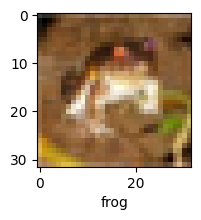

In [35]:
plot_sample(X_train, y_train, 0)

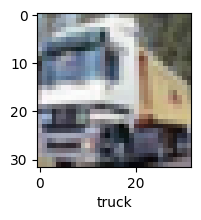

In [36]:
plot_sample(X_train, y_train, 1)

In [37]:

X_train = X_train / 255.0
X_test = X_test / 255.0

In [38]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/Users/bhattbruh/Desktop/Projects/DeepLearning/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3032 - loss: 1.9631
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3207 - loss: 1.9507
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.2745 - loss: 2.5866
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.2459 - loss: 3.6155
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.2333 - loss: 4.8367


In [39]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2250 - loss: 5.9608


[5.960834503173828, 0.22499999403953552]

In [40]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.02      0.04      1000
           1       0.36      0.31      0.33      1000
           2       0.07      0.08      0.07      1000
           3       0.15      0.01      0.03      1000
           4       0.21      0.54      0.30      1000
           5       0.25      0.10      0.14      1000
           6       0.26      0.07      0.11      1000
           7       0.39      0.11      0.18      1000
           8       0.19      0.70      0.31      1000
           9       0.40      0.30      0.34      1000

    accuracy                           0.23     10000
   macro avg       0.26      0.23      0.19     10000
weighted avg       0.26      0.23      0.19     10000



In [41]:
cnn = models.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(10, activation='softmax')    
    ])

/Users/bhattbruh/Desktop/Projects/DeepLearning/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.4664 - loss: 1.4805
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5879 - loss: 1.1914
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6077 - loss: 1.1538
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5845 - loss: 1.3970
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5237 - loss: 2.5215
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4758 - loss: 5.5042
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4372 - loss: 12.2237
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4032 - loss: 24.3739
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3899 - loss: 41.9414
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3673 - loss: 71.7791


In [44]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4291 - loss: 56.8387


[56.838687896728516, 0.42910000681877136]

In [45]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.0000000e+00, 0.0000000e+00, 4.2790962e-33, 9.9998891e-01,
        0.0000000e+00, 1.1141237e-05, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.6494164e-18, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.9431113e-32, 9.0579080e-26],
       [1.9122516e-14, 4.8643934e-25, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9998069e-01, 1.9253699e-05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.9604900e-26, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 4.3094010e-07, 9.2965090e-01,
        7.0348717e-02, 2.4109687e-33, 7.2435315e-37, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [46]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 3]

In [47]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

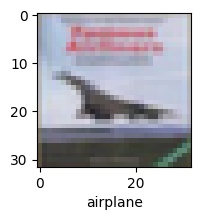

In [48]:
plot_sample(X_test, y_test,3)

In [49]:
classes[y_classes[3]]

'airplane'

In [50]:
classes[y_classes[3]]

'airplane'

In [51]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.51      0.54      1000
           1       0.55      0.48      0.51      1000
           2       0.34      0.40      0.36      1000
           3       0.25      0.23      0.24      1000
           4       0.53      0.24      0.33      1000
           5       0.41      0.43      0.42      1000
           6       0.71      0.25      0.37      1000
           7       0.43      0.66      0.52      1000
           8       0.59      0.45      0.51      1000
           9       0.32      0.65      0.43      1000

    accuracy                           0.43     10000
   macro avg       0.47      0.43      0.42     10000
weighted avg       0.47      0.43      0.42     10000

